# imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from LinearRegression import LinearRegression as lr

[0.15075121 0.46040502]


# read data

In [2]:
data = pd.read_csv("data/houses.txt", header=None)
data.describe()

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1413.710000,2.710000,1.380000,38.650000,362.239520
std,414.249286,0.655898,0.487832,25.914925,104.595007
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1091.000000,2.000000,1.000000,17.000000,287.228000
50%,1405.500000,3.000000,1.000000,25.000000,352.900000
75%,1657.000000,3.000000,2.000000,57.250000,426.245000
max,3194.000000,4.000000,2.000000,107.000000,718.200000


In [3]:
x_train = data.iloc[:, 0:4]
y_train = data.iloc[:, 4]
x_train.describe()
y_train.describe()

count    100.000000
mean     362.239520
std      104.595007
min      158.000000
25%      287.228000
50%      352.900000
75%      426.245000
max      718.200000
Name: 4, dtype: float64

In [4]:
# turn to np arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# visualize each features affect on the output

In [5]:
# function to plot each feature with the target to visualize each feature range and effect
def plot_features(x, y, n_features):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    try:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y)
    except TypeError:
        ax.scatter(x, y)


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")


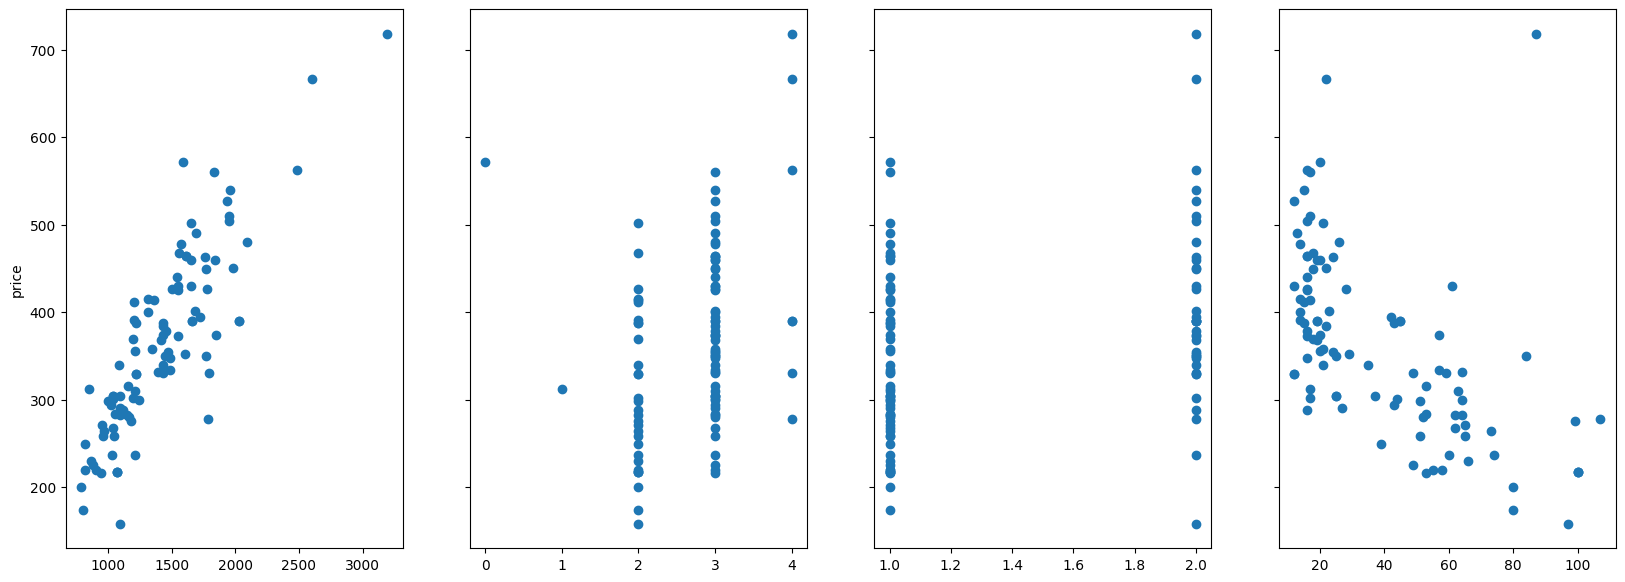

In [6]:
plot_features(x_train, y_train, 4)

# apply z-score normalization on features

In [7]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)

x_train = (x_train - mu) / sigma

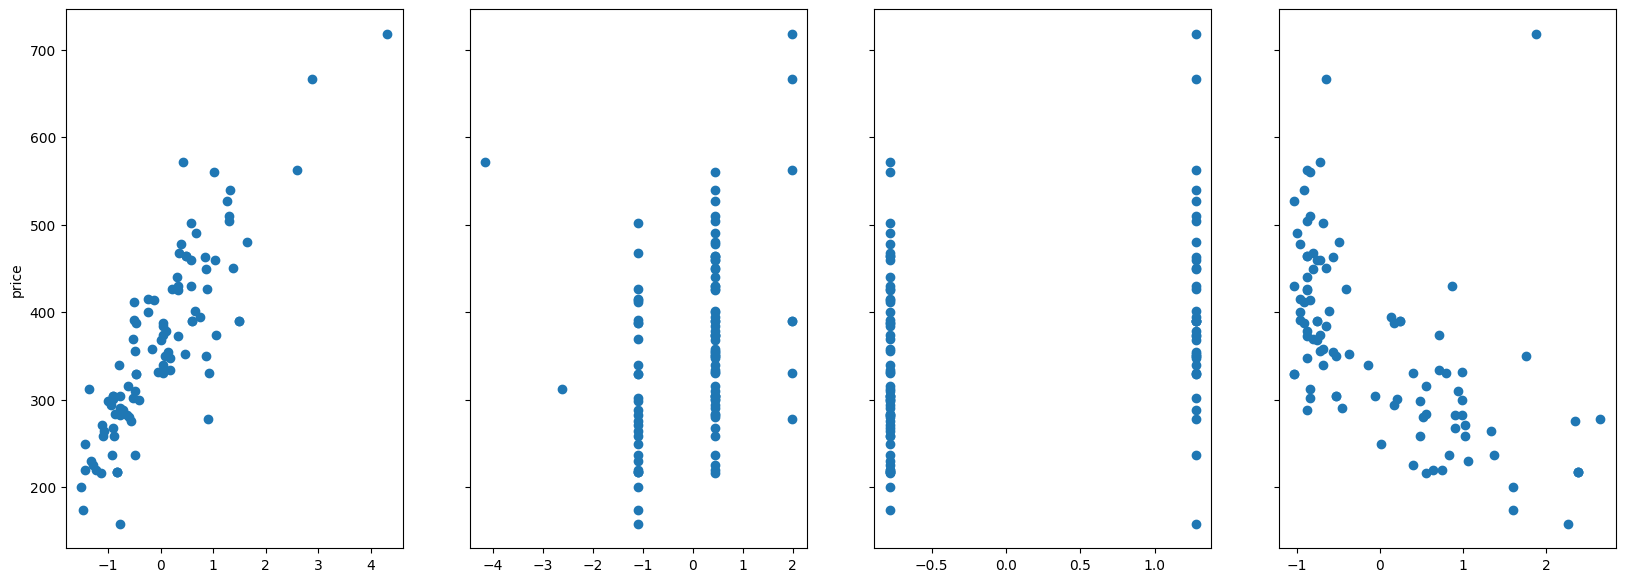

In [8]:
# plot features after normalizing data
plot_features(x_train, y_train, 4)

# train model

In [9]:
# train the model
model = lr()
model.fit(x_train, y_train, lr=0.03, iter_limit=10000)

In [10]:
model.theta

array([109.99776184, -21.1638515 , -32.31758536, -37.89901956])

In [11]:
# predict with train data for lack of evaluation data
y = model.predict(x_train)

# ploting is only posible if one or two features only

# plt.scatter(x_train, y_train, marker="x", color = "red")
# plt.plot(x_train, y)

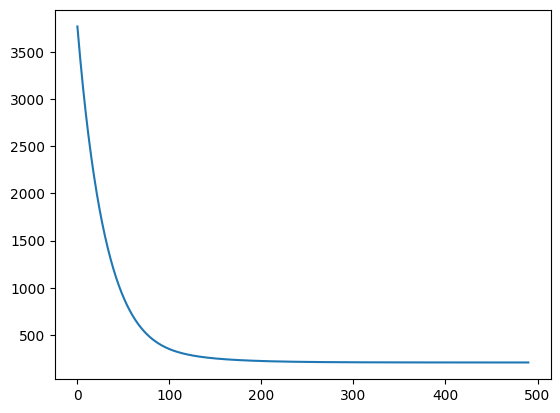

In [12]:
# plot cost history to make sure gradient decent is converging
plt.plot(model.history)

the graph only has 500 entries even tho we set the iterationslimit to 10000 because the fitting function breaks when the change in cost becomes neglegable aka the functon converged to the global minimum

In [13]:
# evrage error in USD
abs(y_train - y).sum() / 100

16.8933660976837